In [1]:
import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from skimage.transform import resize

import warnings
warnings.filterwarnings("ignore")

from perprocess import process_data, generate_y, shuff_data

引入数据处理的包，这个包是我自己编写的，如果有更多需要可以更改与此kernel同文件夹的perprocess.py。

（注意：perprocess.py必须与此kernel放在同一文件中）

In [2]:
filename = "/home/forest/data/LTM_code/LMT_108_SurfaceMaterials_Database/ImageScans/NoFlash/Training/G1EpoxyRasterPlate_Image_1_train1.jpg"
image_data = plt.imread(filename)

读取第一张图片，注意：filename要改基础路径为自己本地图片路径。

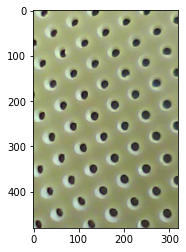

In [3]:
plt.imshow(image_data)

show原图

In [4]:
image_resized = resize(image_data, 
                 (48, 32, 3), mode='constant')

下采样图片为长48,宽32。

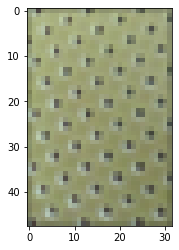

In [5]:
plt.imshow(image_resized)

In [6]:
cats_nums = 108
sizeA = 48
sizeB = 48
seg_sizeA = 480
seg_sizeB = 320

cats_nums是要预处理数据的种类数，总共是108类，也可以只处理10类或20类

size是要送到神经网络的图像大小，例sizeA = 48, sizeB = 32就是（64, 32, 3）

seg_size是要截取图像尺寸，例seg_sizeA = 480，seg_sizeB = 320就为原图：（480, 320, 3），可以按需求截取不同大小的patchs

（注意：seg_sizeA最好大于sizeA， seg_sizeB最好大于sizeB，否则变成了上采样了。

In [7]:
train_path = '/home/forest/data/LTM_code/LMT_108_SurfaceMaterials_Database/ImageScans/NoFlash/Training/'
x_train = process_data(train_path, cats_nums, size, seg_size)

test_path = '/home/forest/data/LTM_code/LMT_108_SurfaceMaterials_Database/ImageScans/NoFlash/Testing/'
x_test = process_data(test_path, cats_nums, size, seg_size)

NameError: name 'process_data' is not defined

处理后:

x_train的shape为（cats_nums*10, sizeA, sizeB, 3）

x_test的shape为（cats_nums*10, sizeA, sizeB, 3）

In [ ]:
y_train, y_test = generate_y(cats_nums)

处理后：

y_train的shape为（cats_nums*10, cats_nums）（one_hot coding）

y_test的shape为（cats_nums*10, cats_nums）（one_hot coding）

In [ ]:
x_train, y_train, x_test, y_test = shuff_data(x_train, y_train, x_test, y_test)

shuff_data打乱数据